### DBSCAN Clustering

Density Based Spatial Clustering of Applications with Noise

Refered from:
https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html
https://www.youtube.com/watch?v=wbS1OXkA5uc

To perform the clustering on the provided datset and hence to identify the possible no.of clusters and different price categories

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#read the dataset from the mentioned path
df = pd.read_csv('D:/semester2/DataMining/training_set_encoded.csv')
#to print the total number of rows and columns
print("Shape of acutual dataset: ", df.shape)
#removing the not used. i,e the price
df = df.drop('price', axis=1)
df = df.drop('price_category', axis=1)
print("Shape updated: ", df.shape)

Shape of acutual dataset:  (74027, 26)
Shape updated:  (74027, 24)


1. Choose any random point and draw a circle with radius equal to epsilon
2. See whether this circle contains minimum number of points
3. If no.of points within the circle is greater than the minimum points, then it is termed as core point/cluster
4. If no.of points within the circle is less than the minimum points, then it is termed as border point

K-Distance graph
To identify optimum epsilon value, we can plot the K-distance graph to identify optimal value for epsilon(distance between two data points)

In [52]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

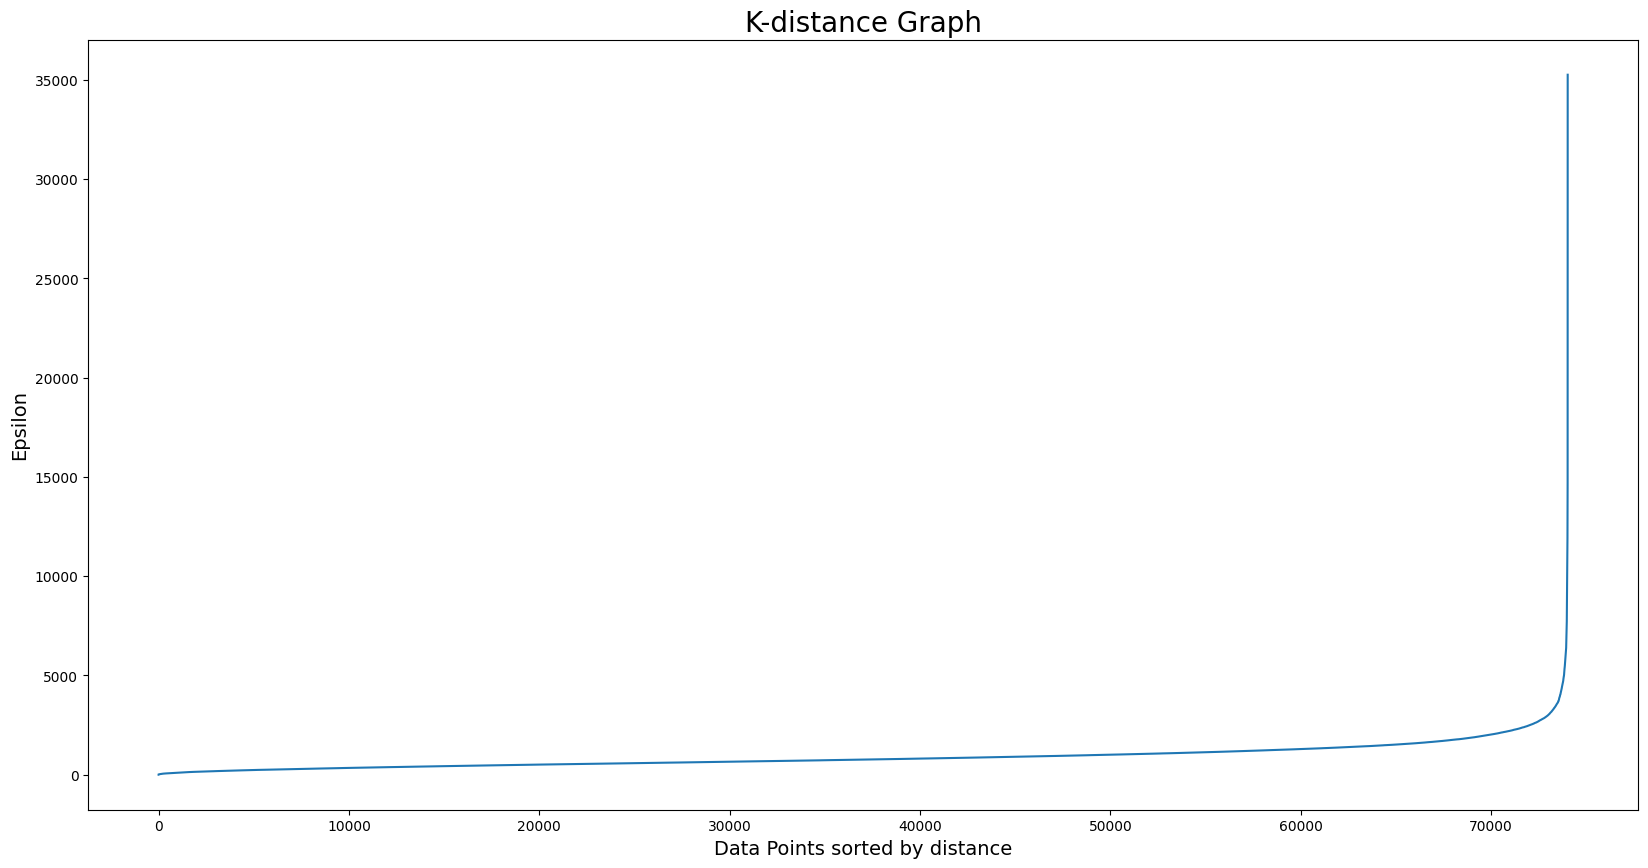

In [53]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [54]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2580, min_samples=90)
cluster_labels=dbscan.fit_predict(df)
#will provide the labels to the clusters formed. '-1' is gnerally termed as noise cluster
np.unique(cluster_labels)

df['cluster'] = dbscan.labels_
df['cluster'].value_counts()

cluster
 0    42323
-1    31527
 2       90
 1       87
Name: count, dtype: int64

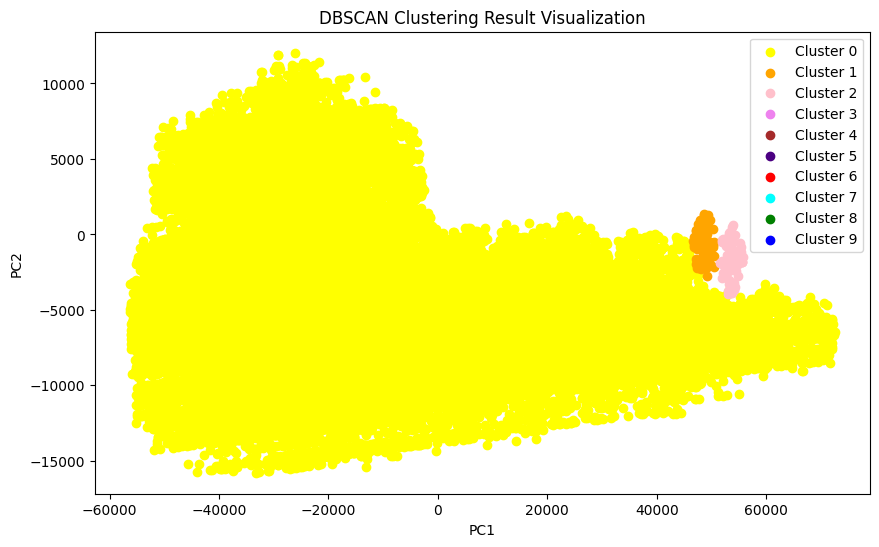

In [55]:
# Reduce the dimensionality of the features to 2 using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df)

# Adding cluster labels to the reduced feature data
reduced_features = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
reduced_features['Cluster'] = cluster_labels  # Fix: Assign cluster_labels instead of n_clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['yellow', 'orange', 'pink', 'violet', 'brown', 'indigo','red','cyan','green','blue']
for cluster_id, color in enumerate(colors):
    cluster_points = reduced_features[reduced_features['Cluster'] == cluster_id]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], c=color, label=f'Cluster {cluster_id}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering Result Visualization')
plt.legend()
plt.show()

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

#dbscan = DBSCAN(eps=2830, min_samples=70)
dbscan = DBSCAN(eps=3200, min_samples=30)
labels = dbscan.fit_predict(df)

silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: -0.4340976987711218


eps=2500, min_samples=25 SS = -0.5551216472567808

eps=2550, min_samples=25 SS = -0.5506986666190606

eps=2570, min_samples=25 SS = -0.5526545885227656

eps=2560, min_samples=25 SS = -0.553132433498057

eps=2600, min_samples=25 SS = -0.6107436486069449

eps=2560, min_samples=100 SS = -0.23773795122533728

eps=2580, min_samples=100 SS = -0.20260692717353343

eps=2580, min_samples=90  SS = 0.021093278766826627

eps=2580, min_samples=80  SS = 0.04016244336785768